# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan José Bustamante Guiral
*Métodos computacionales 2025-I*

---

In [12]:
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import  simpson, trapezoid, quad, fixed_quad, tplquad, dblquad

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [3]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])


L = 0.98
R = 0.142
h = t[1] - t[0]


di_dt = np.zeros_like(i)


di_dt[0] = (-3*i[0] + 4*i[1] - i[2]) / (2*h)
di_dt[-1] = (3*i[-1] - 4*i[-2] + i[-3]) / (2*h)


for k in range(1, len(i)-1):
    di_dt[k] = (i[k+1] - i[k-1]) / (2*h)


epsilon_finita = L * di_dt + R * i


t_sym = sp.symbols('t')
poly = sp.interpolate(list(zip(t, i)), t_sym)
dpoly = sp.diff(poly, t_sym)


di_dt_poly = np.array([float(dpoly.subs(t_sym, val)) for val in t])
epsilon_poly = L * di_dt_poly + R * i

df = pd.DataFrame({
    't (s)': t,
    'i (A)': i,
    'di/dt (finita) (A/s)': di_dt,
    'ε (finita) (V)': epsilon_finita,
    'di/dt (polinomio) (A/s)': di_dt_poly,
    'ε (polinomio) (V)': epsilon_poly,
    'Δε (poly - finite) (V)': epsilon_poly - epsilon_finita
})

print(df)

   t (s)  i (A)  di/dt (finita) (A/s)  ε (finita) (V)  \
0   1.00   3.10                   2.0         2.40020   
1   1.01   3.12                   2.0         2.40304   
2   1.02   3.14                   3.0         3.38588   
3   1.03   3.18                   5.0         5.35156   
4   1.04   3.24                   7.0         7.32008   

   di/dt (polinomio) (A/s)  ε (polinomio) (V)  Δε (poly - finite) (V)  
0                 3.166667           3.543533                1.143333  
1                 1.500000           1.913040               -0.490000  
2                 2.833333           3.222547               -0.163333  
3                 5.166667           5.514893                0.163333  
4                 6.500000           6.830080               -0.490000  


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempos y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [5]:
t = np.array([0, 3, 5, 8, 10, 13])
x = np.array([0, 225, 383, 623, 742, 993])


v = np.zeros_like(x, dtype=float)


v[0] = (x[1] - x[0]) / (t[1] - t[0])
v[-1] = (x[-1] - x[-2]) / (t[-1] - t[-2])

for k in range(1, len(t)-1):
    v[k] = (x[k+1] - x[k-1]) / (t[k+1] - t[k-1])


tsym = sp.Symbol('t')
poly = sp.interpolate(list(zip(t, x)), tsym)
dpoly = sp.diff(poly, tsym)


v_12 = float(dpoly.subs(tsym, 12))


df_vel = pd.DataFrame({
    't (s)': t,
    'x (m)': x,
    'v (m/s)': v
})

df_vel.loc[len(df_vel)] = [12, None, v_12]


print(df_vel)

   t (s)  x (m)    v (m/s)
0    0.0    0.0  75.000000
1    3.0  225.0  76.600000
2    5.0  383.0  79.600000
3    8.0  623.0  71.800000
4   10.0  742.0  74.000000
5   13.0  993.0  83.666667
6   12.0    NaN  91.736978


# 3.
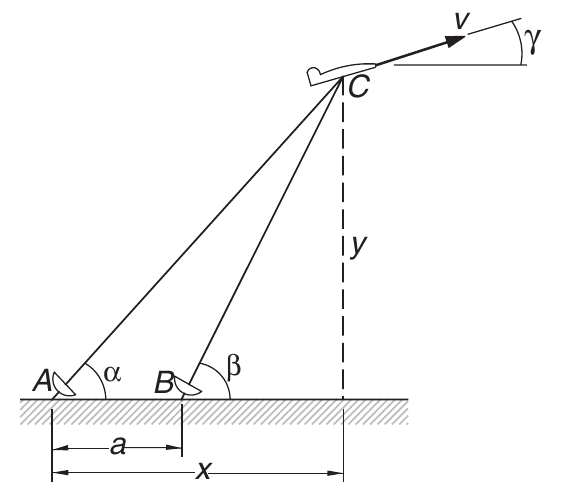


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [7]:
a = 500

data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}
df = pd.DataFrame(data)


alpha_rad = np.radians(df['alpha (°)'])
beta_rad = np.radians(df['beta (°)'])


tan_alpha = np.tan(alpha_rad)
tan_beta = np.tan(beta_rad)
denominator = tan_beta - tan_alpha

x = a * tan_beta / denominator
y = a * tan_alpha * tan_beta / denominator


dx_dt = (x[2] - x[0]) / (df['t (s)'][2] - df['t (s)'][0])
dy_dt = (y[2] - y[0]) / (df['t (s)'][2] - df['t (s)'][0])


v = np.sqrt(dx_dt**2 + dy_dt**2)
gamma_rad = np.arctan2(dy_dt, dx_dt)
gamma_deg = np.degrees(gamma_rad)


print(f'Velocidad del avión: {v:.2f} m/s')
print(f'Ángulo de ascenso: {gamma_deg:.2f}°')

Velocidad del avión: 50.10 m/s
Ángulo de ascenso: 15.14°


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [13]:
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])


t_sub = t[t <= 28]
v_sub = v[:len(t_sub)]


distance = trapezoid(v_sub, t_sub)


i_28 = np.where(t == 28)[0][0]

a_28 = (v[i_28 + 1] - v[i_28 - 1]) / (t[i_28 + 1] - t[i_28 - 1])


print(f"Distancia recorrida hasta t = 28 s: {distance:.2f} m")
print(f"Aceleración en t = 28 s: {a_28:.2f} m/s²")

Distancia recorrida hasta t = 28 s: 2309.00 m
Aceleración en t = 28 s: 1.72 m/s²


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [23]:
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])                # profundidad en metros
V = np.array([9.875, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])       # concentración en g/m³

dV_dz = -np.gradient(V, z)  # derivada numérica de V respecto a z
A_s = dV_dz                 # A_s(z) en m²


Volumen_T = np.trapezoid(A_s, z)

integral_num = np.trapezoid(c * A_s, z)


c_promedio = integral_num / Volumen_T

print(f'Área superficial A_s(z): {A_s}')
print(f'Volumen total V_T: {VT} m³')
print(f'Concentración promedio: {c_promedio} g/m³')


Área superficial A_s(z): [1192475.   988937.5  589050.   245437.5   98175. ]
Volumen total V_T: 9875000.0 m³
Concentración promedio: 8.232544810126582 g/m³


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea menor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



 R  Trapecio  Simpson    Gauss
10  0.940481 0.940481 0.940481
11  0.968223 0.968223 0.968223
12  0.983552 0.983552 0.983552
13  0.991708 0.991708 0.991708
14  0.995913 0.995913 0.995913
15  0.998025 0.998025 0.998025
16  0.999062 0.999062 0.999062
17  0.999561 0.999561 0.999561
18  0.999797 0.999797 0.999797
19  0.999908 0.999908 0.999908
20  0.999958 0.999958 0.999958
21  0.999981 0.999981 0.999981
22  0.999992 0.999992 0.999992
23  0.999996 0.999996 0.999996
24  0.999998 0.999998 0.999998
25  0.999999 0.999999 0.999999


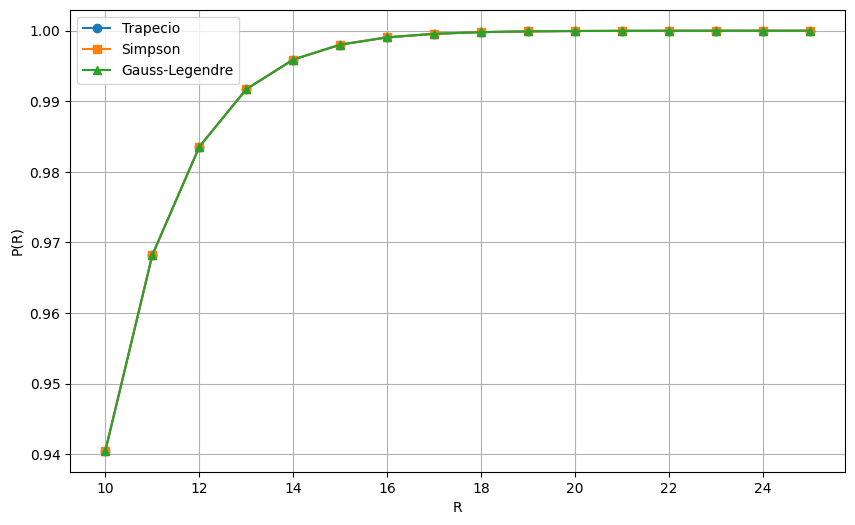

In [20]:
def integrando(r):
    return r**2 * (2 - r)**2 * np.exp(-r)

def P_trapecio(R, h=1e-3):
    n = int(R / h)
    x = np.linspace(0, R, n + 1)
    fx = integrando(x)
    integral = h * (0.5 * (fx[0] + fx[-1]) + fx[1:-1].sum())
    return integral / 8

def P_simpson(R, h=1e-3):
    n = int(R / h)
    if n % 2 == 1:
        n += 1  # número par de intervalos
    h = R / n
    x = np.linspace(0, R, n + 1)
    fx = integrando(x)
    integral = h / 3 * (fx[0] + fx[-1] +
                        4 * fx[1:-1:2].sum() +
                        2 * fx[2:-2:2].sum())
    return integral / 8

# Cuadratura Gauss-Legendre de orden dado
def P_gauss(R, order=64):
    nodes, weights = np.polynomial.legendre.leggauss(order)
    t = 0.5 * (nodes + 1) * R  # de [-1,1] a [0,R]
    integral = 0.5 * R * np.dot(weights, integrando(t))
    return integral / 8

# Calcular probabilidades para R = 10 a 25
resultados = []
for R in range(10, 26):
    p_trap = P_trapecio(R)
    p_simp = P_simpson(R)
    p_gauss = P_gauss(R)
    resultados.append((R, p_trap, p_simp, p_gauss))


df = pd.DataFrame(resultados, columns=['R', 'Trapecio', 'Simpson', 'Gauss'])


print(df.to_string(index=False))


plt.figure(figsize=(10, 6))
plt.plot(df['R'], df['Trapecio'], 'o-', label='Trapecio')
plt.plot(df['R'], df['Simpson'], 's-', label='Simpson')
plt.plot(df['R'], df['Gauss'], '^-', label='Gauss-Legendre')
plt.xlabel('R')
plt.ylabel('P(R)')
plt.grid()
plt.legend()
plt.show()

# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

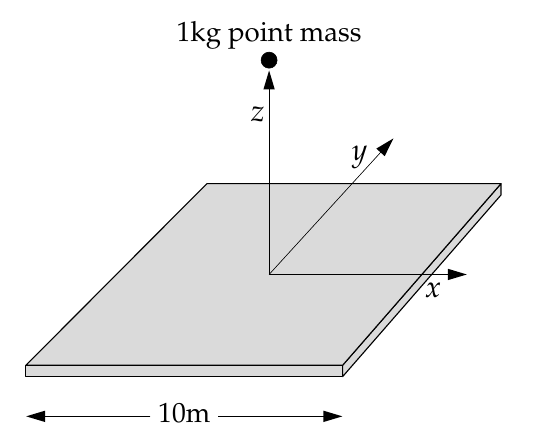

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


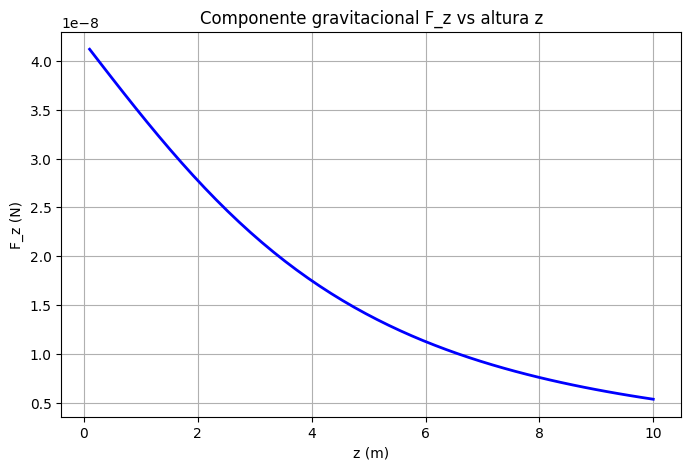

In [26]:
G = 6.674e-11      # constante de gravitación universal
L = 10.0           # longitud del lado de la lámina (m)
M = 10000.0        # masa de la lámina (kg)
sigma = M / L**2   # densidad superficial (kg/m^2)


def integrando(y, x, z):
    return 1 / (x**2 + y**2 + z**2)**(1.5)

#

def Fz(z):
    '''
    Función que calcula Fz para un valor dado de z
    '''

    integral, error = dblquad(
        integrando,
        -L/2, L/2,         # límites de x
        lambda x: -L/2,    # límite inferior de y
        lambda x: L/2,     # límite superior de y
        args=(z,)
    )
    return G * sigma * z * integral


# Calcular Fz para varios valores de z
z_vals = np.linspace(0.1, 10, 50)  # evitamos z=0 para no dividir por cero
fz_vals = [Fz(z) for z in z_vals]


plt.figure(figsize=(8, 5))
plt.plot(z_vals, fz_vals, 'b-', linewidth=2)
plt.xlabel('z (m)')
plt.ylabel('F_z (N)')
plt.title('Componente gravitacional F_z vs altura z')
plt.grid()
plt.show()
